<a href="https://colab.research.google.com/github/Ahmed-M-Elshazly/Homework-1/blob/main/Homework_1_problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 1
#Problem 1
#Name: Ahmed Elshazly
#Student ID:801420724

         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375
X =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100
n =  100
Final value of theta = [ 5.92794892 -2.03833663]
cost_history = [5.32852962 5.18676104 5.07204859 ... 0.98499308 0.98499308 0.98499308]


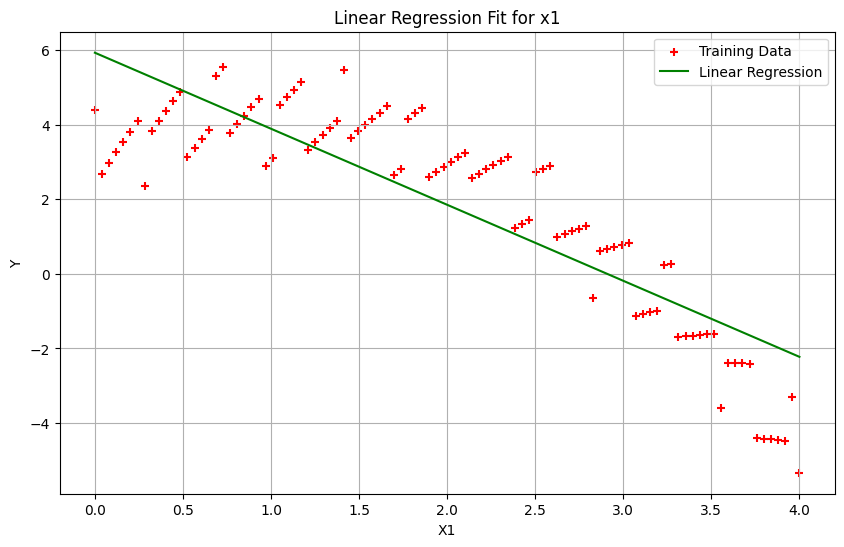

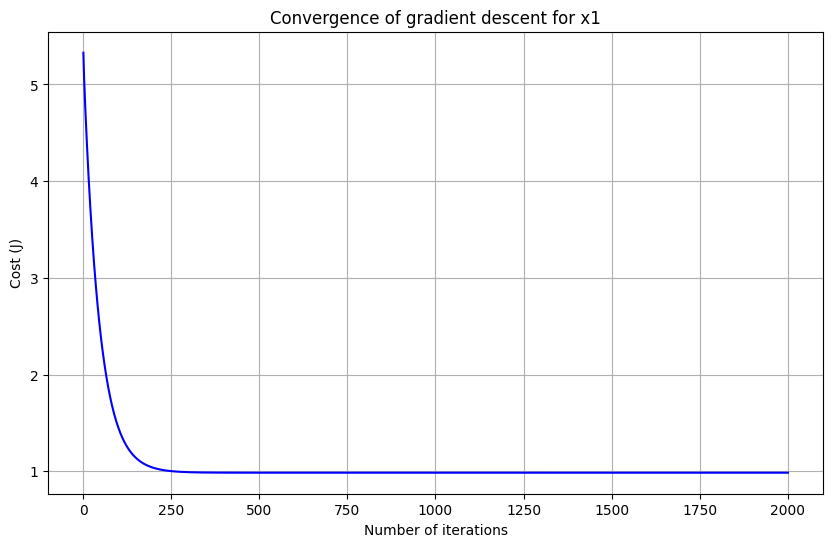

X =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100
n =  100
Final value of theta = [0.73606043 0.55760761]
cost_history = [4.5369622  4.06234927 3.83409365 ... 3.59936602 3.59936602 3.59936602]


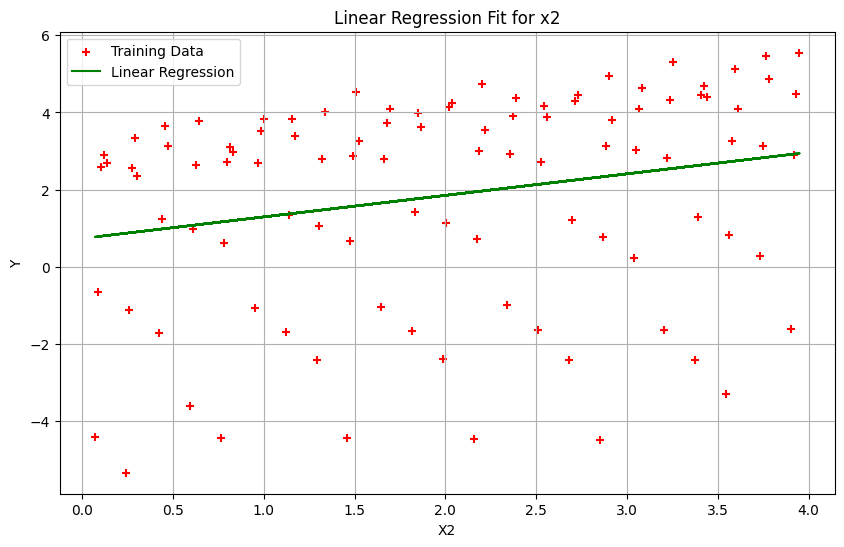

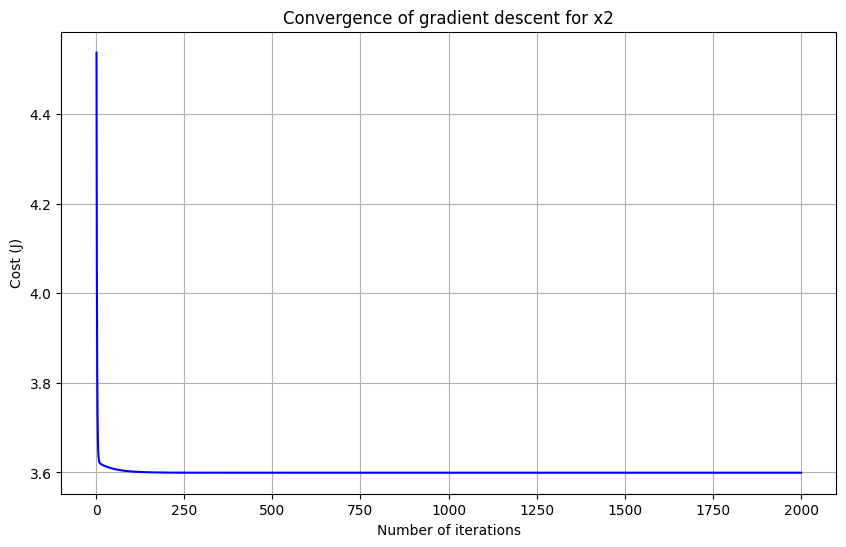

X =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100
n =  100
Final value of theta = [ 2.8714221  -0.52048288]
cost_history = [5.00990921 4.74622414 4.60645259 ... 3.62945112 3.62945112 3.62945112]


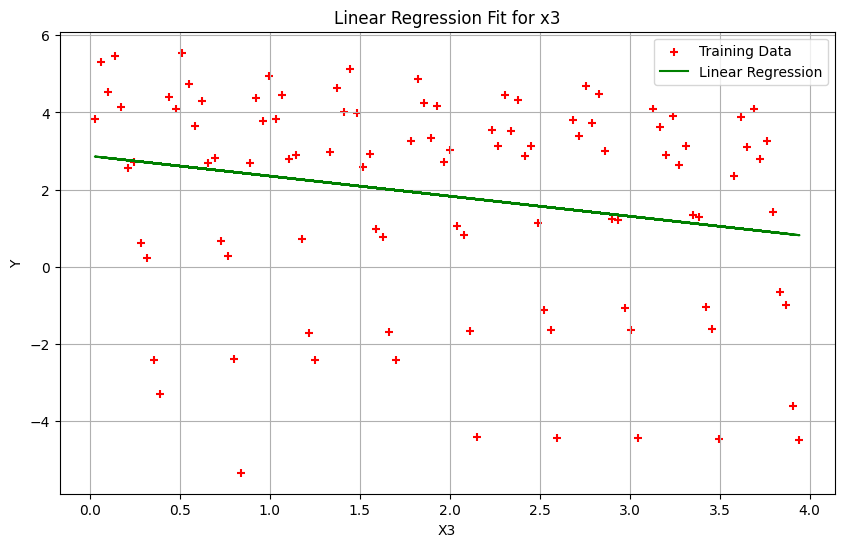

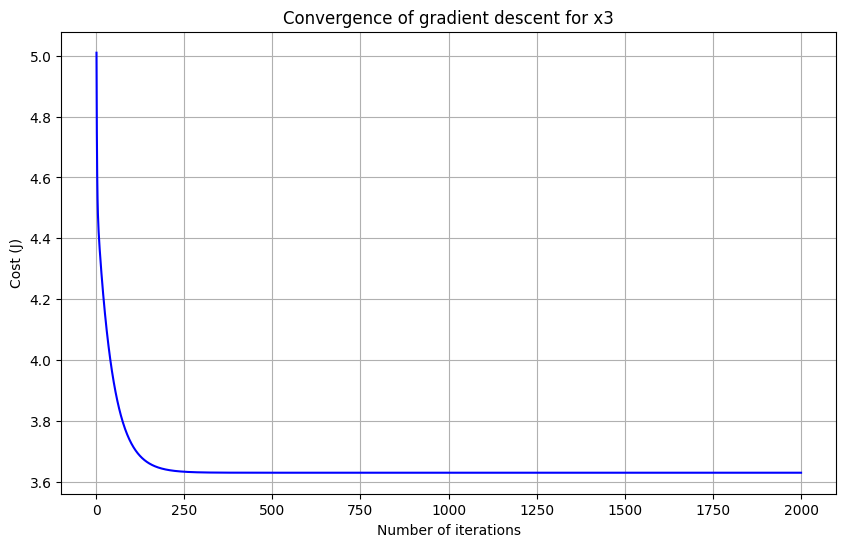

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/Ahmed-M-Elshazly/Database/main/D3.csv'

df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
print(df.head())


variables= 3 #we define the number of the explanatory variables x1, x2 and x3.

for ii in range(variables): # for loop to work with a single explanatory variable in each iteration
  X = df.values[:,ii]  # get input values from the column  related to the selected explanatory variable -- X
  y = df.values[:, 3]  # get output values from second column -- Y
  m = len(y)  # Number of training examples
  n = len(X)  # Number of training examples


  # Display first 5 records and the total number of training examples
  print('X = ', X[: 5])
  print('y = ', y[: 5])
  print('m = ', m)
  print('n = ', n)

  #plt.scatter(X, y, color='red', marker='+')
  # Grid, labels, and title
  #plt.grid(True)
  #plt.rcParams["figure.figsize"] = (6, 6)
  #plt.xlabel('X{}'.format(ii+1))
  #plt.ylabel('Y')
  #plt.title('Scatter plot of training data for x{}'.format(ii))

  # Show the plot
  plt.show()


  X_0 = np.ones((m, 1)) #  create a column with all ones, which represents the x0 values
  X_1 = X.reshape(m, 1) # #reshape the X data to be in a column.
  X = np.hstack((X_0, X_1)) #concatenate X with X0 in a single matrix

  theta = np.zeros(2)  # we need 2 theta parameterds theta0 and theta1, because we have X0 beside selected X data

#Defining the cost computational function
  def compute_cost(X, y, theta):
    predictions = X.dot(theta)  # the predicted values are achieved by multiplying the  concatenated X matrix by the theta column
    errors = np.subtract(predictions, y) # error is calculated by subtracting the predicted values from the ground truth values
    sqrErrors = np.square(errors) # squaring the errors because we work with convex cost function
    J = 1 / (2 * m) * np.sum(sqrErrors) #cost calculation based on the cost function mentioned in lectures
    return J

# defining the gradient descent algorithm
  def gradient_descent(X, y, theta, alpha, iterations):

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)  #initialize the cost history array to have zeros which will be updated during training
    for i in range(iterations):  # loop over the number of iterations to update the parameters theta, and calculate thre cost
        predictions = X.dot(theta)   # calculate the predictions after multypling the concatenated X by theta
        errors = np.subtract(predictions, y) #subtract the predictions from the ground truth
        theta -= (alpha / m) * X.transpose().dot(errors) # parametres update according to lecture to get the new parameters with alpha is considered the learning rate
        cost_history[i] = compute_cost(X, y, theta) #calculate the cost for every iteration, by applying X matrix, theta, and ground truth y to get the cost

    return theta, cost_history

  theta = [0., 0.]
  iterations = 2000
  alpha = 0.05

  theta, cost_history = gradient_descent(X, y, theta, alpha, iterations) #apply the gradient descent function
  print('Final value of theta =', theta)
  print('cost_history =', cost_history)

  plt.scatter(X[:, 1], y, color='red', marker='+', label='Training Data') # plot the values of y versus values of X

  # Line plot for the linear regression model
  plt.plot(X[:, 1], X.dot(theta), color='green', label='Linear Regression')

  # Plot customizations
  plt.rcParams["figure.figsize"] = (10, 6)
  plt.grid(True)
  plt.xlabel('X{}'.format(ii+1))
  plt.ylabel('Y')
  plt.title('Linear Regression Fit for x{}'.format(ii+1))
  plt.legend()

  # Show the plot
  plt.show()


  plt.plot(range(1, iterations + 1), cost_history, color='blue')
  plt.rcParams["figure.figsize"] = (10, 6)
  plt.grid(True)

  plt.xlabel('Number of iterations')
  plt.ylabel('Cost (J)')
  plt.title('Convergence of gradient descent for x{}'.format(ii+1))

  # Show the plot
  plt.show()



